In [1]:
from sklearn import tree
import pandas as pd
import os

In [2]:
activity = pd.read_csv(os.path.join('andrew_data2.csv'))
activity.head()

,id,type,type_m,x_gear_name,start_date_local,x_start_h,name,x_min,x_km,x_min/km,...,start_longitude,timezone,total_photo_count,trainer,upload_id,upload_id_str,utc_offset,x_date,x_elev_%,x_url
0,2850013230,Run,Hike,NaN,07.11.2019 16:46:32,16.8,Afternoon Run,42.1,0.458,92.08,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3022102505,3022102505,-28800,2019-11-07,NaN,https://www.strava.com/activities/2850013230
1,2895327719,Run,Hike,NaN,22.11.2019 17:05:04,17.1,Afternoon Run,20.1,0.234,85.91,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3077242534,3077242534,-28800,2019-11-22,NaN,https://www.strava.com/activities/2895327719
2,2832492215,Run,Hike,NaN,31.10.2019 15:41:16,15.7,Afternoon Run,62.1,0.870,71.53,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3002283821,3002283821,-25200,2019-10-31,NaN,https://www.strava.com/activities/2832492215
3,2832492192,Run,Hike,NaN,28.10.2019 15:17:05,15.3,Afternoon Run,42.1,0.686,61.27,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3002283809,3002283809,-25200,2019-10-28,NaN,https://www.strava.com/activities/2832492192
4,2877878037,Run,Hike,NaN,18.11.2019 16:00:16,16.0,Afternoon Run,52.1,0.907,57.47,...,NaN,(GMT-08:00) America/Los_Angeles,0,1,3055046850,3055046850,-28800,2019-11-18,NaN,https://www.strava.com/activities/2877878037


In [3]:
activity_clean = activity[["type_m", "x_start_h", "x_min", "average_heartrate", "max_heartrate", "average_cadence"]]
activity_clean.head()

,type_m,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
0,Hike,16.8,42.1,127.2,161.0,42.3
1,Hike,17.1,20.1,114.8,148.0,43.0
2,Hike,15.7,62.1,118.6,156.0,43.5
3,Hike,15.3,42.1,125.4,156.0,46.7
4,Hike,16.0,52.1,137.4,154.0,44.7


In [4]:
data2 = activity_clean.dropna()
data2.head()

,type_m,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
0,Hike,16.8,42.1,127.2,161.0,42.3
1,Hike,17.1,20.1,114.8,148.0,43.0
2,Hike,15.7,62.1,118.6,156.0,43.5
3,Hike,15.3,42.1,125.4,156.0,46.7
4,Hike,16.0,52.1,137.4,154.0,44.7


In [5]:
target = data2["type_m"]
target_names = ["Hike", "Elliptical", "Run"]

In [6]:
data = data2.drop("type_m", axis=1)
feature_names = data.columns
data.head()

,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
0,16.8,42.1,127.2,161.0,42.3
1,17.1,20.1,114.8,148.0,43.0
2,15.7,62.1,118.6,156.0,43.5
3,15.3,42.1,125.4,156.0,46.7
4,16.0,52.1,137.4,154.0,44.7


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9411764705882353

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_trainpredictions = classifier.predict(X_test))
rf.score(X_test, y_test)predictions = classifier.predict(X_test)

0.9803921568627451

In [15]:
predictions = clf.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Run' 'Run' 'Run' 'Hike' 'Run' 'Run' 'Run' 'Run' 'Run' 'Run']
First 10 Actual labels: ['Run', 'Run', 'Run', 'Hike', 'Run', 'Run', 'Run', 'Run', 'Run', 'Run']


In [16]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(y_test,predictions)

In [17]:
prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
prediction_df.head(20)

,Prediction,Actual
0,Run,Run
1,Run,Run
2,Run,Run
3,Hike,Hike
4,Run,Run
5,Run,Run
6,Run,Run
7,Run,Run
8,Run,Run
9,Run,Run


In [19]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[11,  2,  0],
       [ 3,  8,  0],
       [ 1,  0, 77]], dtype=int64)

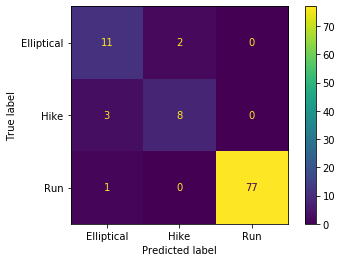

In [21]:
plot_confusion_matrix(clf,X_test,y_test)

In [10]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6263300640433707, 'average_cadence'),
 (0.1488137803511318, 'average_heartrate'),
 (0.08282738694849799, 'x_start_h'),
 (0.07329981232310176, 'x_min'),
 (0.06872895633389771, 'max_heartrate')]